In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data visualization
One of the most important features of Python for scientists is its vast capability to generate figures.

In general, the generation of simple figures from data is very straightforward and can be done with a minimal amount of code. However, tweaking these figures to actually obtain production-ready images can take a bit more time and effort. While almost every kind of figure, no matter how complex its layout is, can be produced through Matplotlib, Python's main graphic backend, sometimes additional libraries can be useful. Moreso, it is also possible to code the major parts of the figure, and then use other design programs to produce complex compositions or to tweak visual aspects to obtain the "perfect" plot.

A personal recommendation is exporting plots in the SVG format and then use the free, open-source tool [Inkscape](https://inkscape.org/es/) (for Windows, Linux and Mac OS) to add details, tweak legend positions, and many others, as any single element in the image can be directly modified inside Inkscape.


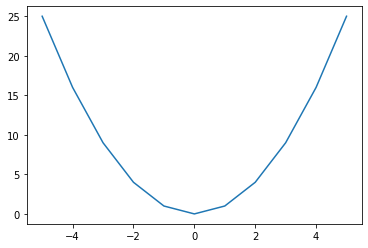

In [2]:
# Create a Figure and add an Axis to it, to build the canvas
fig = plt.figure()
ax = fig.add_subplot()

### Simple line plot: x and y values. Start with a parabola y = x**2 and shift it
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y = x**2

ax.plot(x,y)

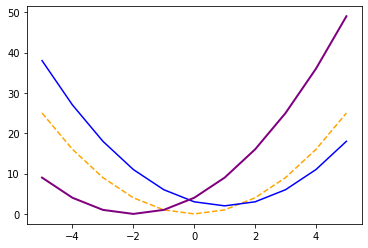

In [3]:
# Multiple plots can be put in the same Axis: for example, shifted parabolas and y = x**3

fig = plt.figure()
ax = fig.add_subplot()

### Simple line plot: x and y values. Start with a parabola y = x**2 and shift it
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y1 = x**2
y2 = (x-1)**2 + 2
y3 = (x+2)**2 

# we can also choose the colors and the general appearance

ax.plot(x,y1,color="orange",linestyle="--")
ax.plot(x,y2,color="blue")
ax.plot(x,y3,color="purple",linewidth=2)

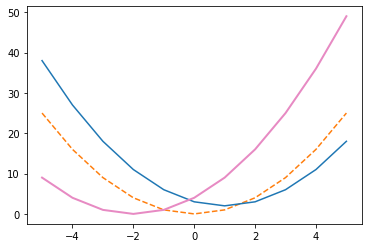

In [4]:
# Somehow nicer colors can be directly obtained through the tab: variants
# Custom colors can be used with the corresponding hex codes. Recommended to have a nice, consistent palette 
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x,y1,color="tab:orange",linestyle="--")
ax.plot(x,y2,color="tab:blue")
ax.plot(x,y3,color="#e78ac3",linewidth=2)

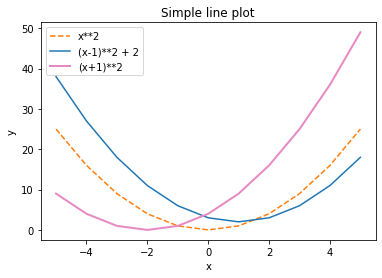

In [5]:
# Also, add important elements: labels for axes, title, and legend
fig = plt.figure()
ax = fig.add_subplot()

# include label= field for the legend

ax.plot(x,y1,color="tab:orange",label="x**2",linestyle="--")
ax.plot(x,y2,color="tab:blue",label="(x-1)**2 + 2")
ax.plot(x,y3,color="#e78ac3",linewidth=2,label="(x+1)**2")

# Other elements such as titles are added AFTER the figure has been created
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple line plot")
ax.legend()

(0.0, 6.0)

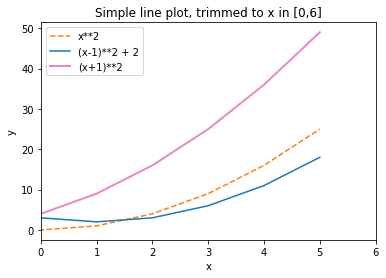

In [6]:
# We can also change the range of the axes

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x,y1,color="tab:orange",label="x**2",linestyle="--")
ax.plot(x,y2,color="tab:blue",label="(x-1)**2 + 2")
ax.plot(x,y3,color="#e78ac3",linewidth=2,label="(x+1)**2")

# Other elements such as titles are added AFTER the figure has been created
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple line plot, trimmed to x in [0,6]")
ax.legend()

ax.set_xlim([0,6])

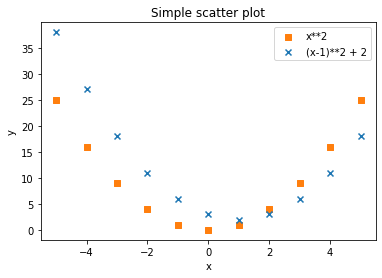

In [7]:
# There are more plot types: instead of lines, use a scatterplot with points

fig = plt.figure()
ax = fig.add_subplot()

# We can control the markers: look at the docs for correspondences
# o (or by default) is a circle, x is a cross, s is a square

ax.scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax.scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Simple scatter plot")
ax.legend()

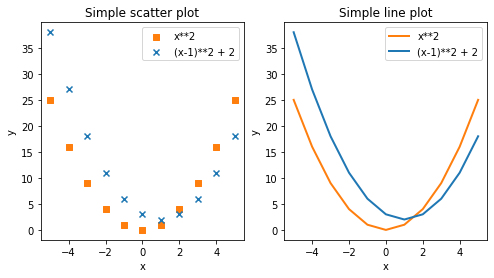

In [8]:
# It is also possible to create layouts where multiple plots are brought together
# Layouts are generated as arrays of size Nrows,Ncols
# An each individual axis is accessed by ax[i,j]

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax[0].scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax[1].plot(x,y1,color="tab:orange",label="x**2",linewidth=2)
ax[1].plot(x,y2,color="tab:blue",label="(x-1)**2 + 2",linewidth=2)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Simple scatter plot")

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Simple line plot")

ax[0].legend()
ax[1].legend()

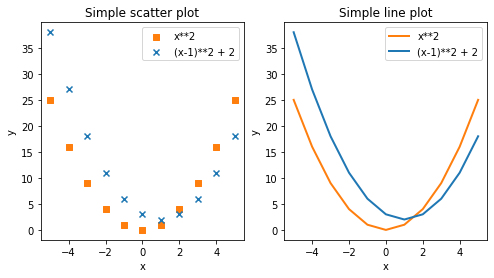

In [9]:
# Figures can be saved in multiple formats, but recommendations would be PNG (good quality, compatible
# with almost everything, not too large, preferred by many journals) and SVG (vectorial, unlimited 
# zooming and editing outside Python)
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(x,y1,color="tab:orange",label="x**2",marker="s")
ax[0].scatter(x,y2,color="tab:blue",label="(x-1)**2 + 2",marker="x")

ax[1].plot(x,y1,color="tab:orange",label="x**2",linewidth=2)
ax[1].plot(x,y2,color="tab:blue",label="(x-1)**2 + 2",linewidth=2)

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Simple scatter plot")

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Simple line plot")

ax[0].legend()
ax[1].legend()

plt.savefig("TestScatterplot.png")
plt.savefig("TestScatterplot.svg")

Of course, we can also do plots on more complex data, such as DataFrames (e.g. information extracted from an experiment or simulation). Recovering the wines example from the Pandas part, we may plot the residual sugar against the alcohol content.

In [10]:
### Physicochemical properties of wines
data = pd.read_csv("datasets/wine-quality-white-and-red.csv")
display(data)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Text(0.5, 1.0, 'Wine data')

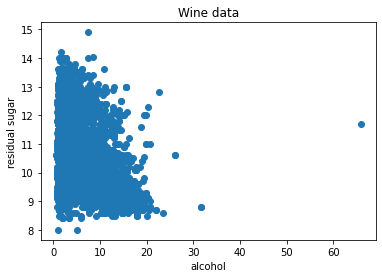

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(data.loc[:,"residual sugar"],data.loc[:,"alcohol"])

# All is added AFTER the figure
ax.set_xlabel("alcohol")
ax.set_ylabel("residual sugar")
ax.set_title("Wine data")


<AxesSubplot: xlabel='residual sugar', ylabel='alcohol'>

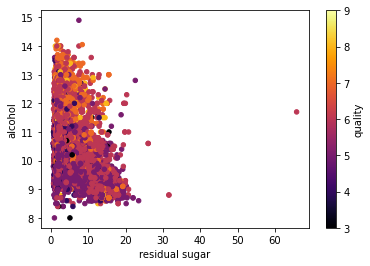

In [12]:
# If we have DataFrames, we can also directly plot from the DF, only needing to specify
# the names of the columns to plot

# Also, we may color points according to other numeric variable in the same DataFrame: e.g. the quality

fig = plt.figure()
ax = fig.add_subplot()

data.plot.scatter("residual sugar","alcohol",c="quality",ax=ax,cmap="inferno")

## Seaborn
Beyond Matplotlib, the seaborn library is another alternative for scientific plotting.

Seaborn is very adapted to the Pandas ecosystem, and is best for working with DataFrames. In general, out-of-the-box it provides better overall look and some very powerful built-in features. For instance, it allows to automatically use categorical variables in the DataFrame to group elements in the plot and assign different colors and/or markers, which can be really useful in the visualization of complex datasets. From the point of view of convenience, seaborn plots also include automatic axis naming, legends... 

Nonetheless, these plots are also less customizable, and can be a bit cumbersome to work with if the plot "drifts" from the core functionalities in seaborn. In general, if something looks to difficult to tweak using seaborn, it is advisable to either think about using Matplotlib instead or modifying by-hand in an image editor.


<AxesSubplot: xlabel='residual sugar', ylabel='alcohol'>

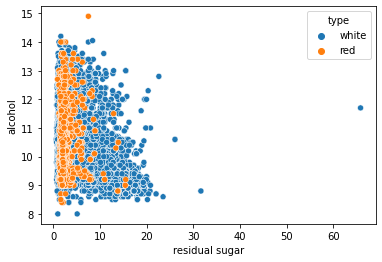

In [13]:
# Plot for sugar and alcohol in wines, using the categorical variable type (red or white) to group
# values automatically
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(data=data,x="residual sugar",y="alcohol",ax=ax,hue="type")


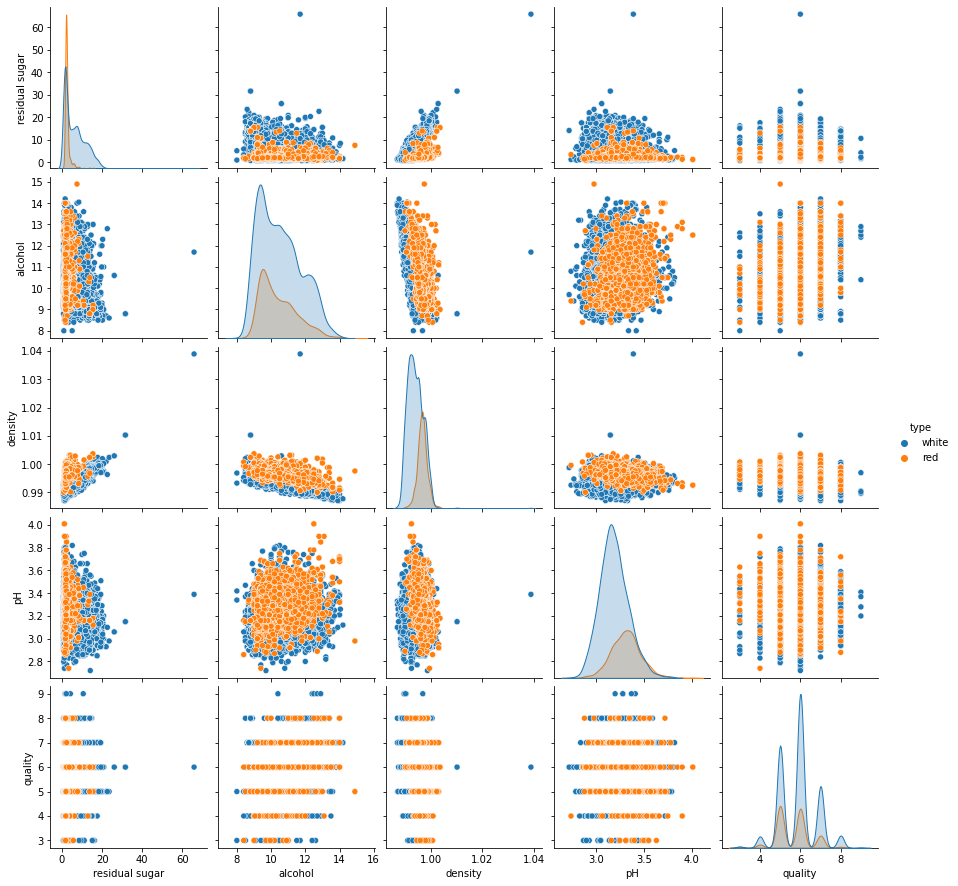

In [14]:
# Seaborn includes multiple complex plots, such as the pairplot, that considers all columns in a
# DataFrame to plot all possible X/Y combinations. Cells where a variable is plotted against itself 
# are shown as density plots, providing an immediate idea on the distribution of the variable
sel4 = data.loc[:,["type","residual sugar","alcohol","density","pH","quality"]]
sns.pairplot(sel4,hue="type")

#### Histograms
Plots of a univariate data distribution, essential to work with medium to large quantitative datasets in order to know how the values behave.

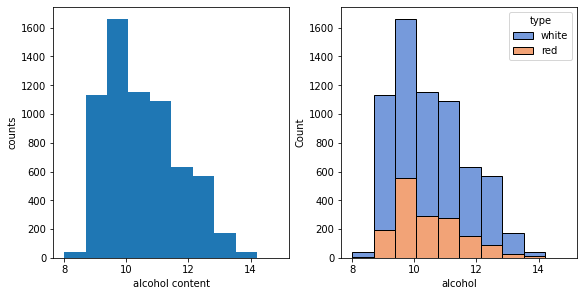

In [15]:
# Use either Matplotlib (more control) or Seaborn (more out-of-the-box
# functionalities)
fig,ax = plt.subplots(1,2,figsize=(8,4),constrained_layout=True)

hist1 = ax[0].hist(data["alcohol"],color="tab:blue")
ax[0].set_xlabel("alcohol content")
ax[0].set_ylabel("counts")
hist2 = sns.histplot(data=data,x="alcohol",hue="type",
                     ax=ax[1],bins=10,palette="muted",hue_order=("white","red"),
                    multiple="stack")


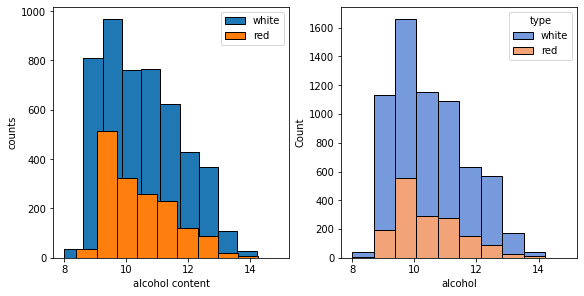

In [16]:
# To do the same with Matplotlib, we should go through categories separately: loop or groupby
fig,ax = plt.subplots(1,2,figsize=(8,4),constrained_layout=True)
wine_types = data.loc[:,"type"].unique()
for typ in wine_types:
    sel = data[data.loc[:,"type"] == typ]
    ax[0].hist(sel["alcohol"],label=typ,linewidth=1,edgecolor="black")
ax[0].set_xlabel("alcohol content")
ax[0].set_ylabel("counts")
ax[0].legend()
hist2 = sns.histplot(data=data,x="alcohol",hue="type",
                     ax=ax[1],bins=10,palette="muted",hue_order=("white","red"),
                    multiple="stack")


#### Heatmaps
Representation of matrix-like data. There are two categorical axes (X and Y): each value in the matrix corresponds to a numerical property (e.g. cross-tables and pivot tables from previous lessons). The numeric values are represented with a color scale, giving an immediate idea of their magnitudes: specific numbers can also be included.

Very useful for high-throughput data, either for experiments or for simulations.

In [17]:
### Nobel awardees in history
nobel = pd.read_csv("datasets/nobel-complete.csv")
### Add decades, as seen previously
def get_decade(year):
    # Takes a given year and obtains the decade it belongs to
    return int(year/10)*10
nobel.loc[:,"awardDecade"] = nobel.loc[:,"awardYear"].apply(get_decade)
# Select and clean
sel_nobel = nobel.loc[:,["awardYear","gender","birth_continent","category","awardDecade"]].dropna()
display(sel_nobel)

,awardYear,gender,birth_continent,category,awardDecade
0,2001,male,North America,Economic Sciences,2000
1,1975,male,Europe,Physics,1970
2,2004,male,Asia,Chemistry,2000
3,1982,male,Europe,Chemistry,1980
4,1979,male,Asia,Physics,1970
...,...,...,...,...,...
942,2000,male,Europe,Physics,2000
943,1980,male,Europe,Chemistry,1980
945,1972,male,North America,Physics,1970
946,1954,male,North America,Chemistry,1950


birth_continent,Africa,Asia,Europe,North America,Oceania,South America
category,,,,,,
Chemistry,3,16,103,59,3,0
Economic Sciences,0,3,30,51,0,0
Literature,6,10,80,16,0,4
Peace,13,13,53,23,2,3
Physics,2,20,114,75,2,0
Physiology or Medicine,3,10,114,80,8,4


<AxesSubplot: xlabel='birth_continent', ylabel='category'>

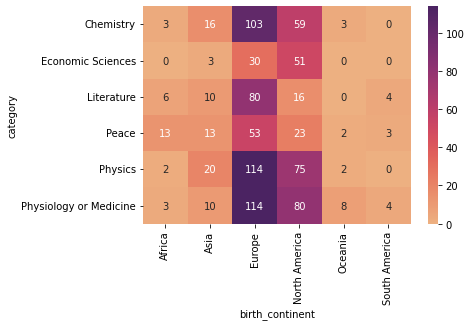

In [18]:
# Nobel prize dataset: geographical distribution by category
table = pd.crosstab(sel_nobel.loc[:,"category"],sel_nobel.loc[:,"birth_continent"])
display(table)
sns.heatmap(table,cmap="flare",annot=True,fmt='d')

birth_continent,Africa,Asia,Europe,North America,Oceania,South America
awardDecade,,,,,,
1900,0,2,52,1,1,0
1910,0,1,33,3,1,0
1920,0,1,48,5,0,0
1930,0,1,39,14,0,1
1940,0,1,22,14,1,2
1950,2,3,44,22,0,0
1960,2,5,39,24,4,1
1970,2,4,60,35,1,1
1980,4,6,44,36,0,4


<AxesSubplot: xlabel='birth_continent', ylabel='awardDecade'>

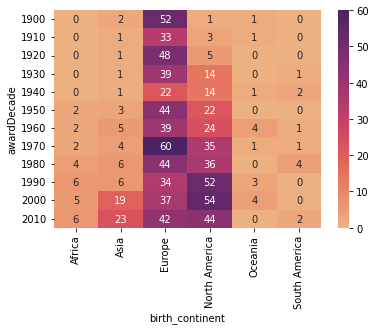

In [19]:
# We can do the same with decade and continent, to see time evolution
table2 = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"birth_continent"])
display(table2)
sns.heatmap(table2,cmap="flare",annot=True,fmt='d')

<AxesSubplot: xlabel='birth_continent', ylabel='awardDecade'>

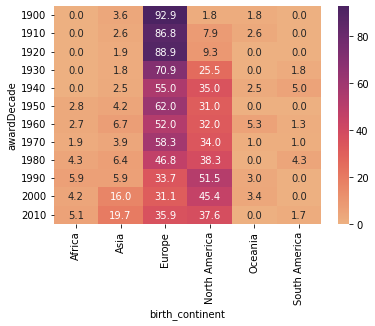

In [20]:
# For clarity, this will be nicer if we compute percentages per decade, with a small data manipulation
counts = table2.sum(axis="columns")
table3 = table2.div(counts,axis="rows")*100
sns.heatmap(table3,cmap="flare",annot=True,fmt='.1f')

gender,female,male
awardDecade,,
1900,3,53
1910,1,37
1920,2,52
1930,3,52
1940,3,37
1950,0,71
1960,3,72
1970,4,99
1980,4,90


<AxesSubplot: xlabel='gender', ylabel='awardDecade'>

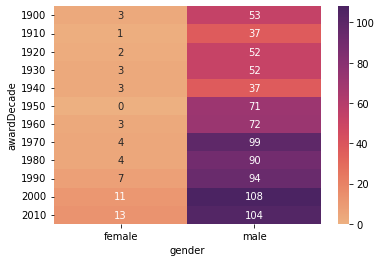

In [21]:
# We can do the same with gender instead of continent, but here only two factors are included: the
# heatmap can be produced, but will not be the best visualization

table4 = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"gender"])
display(table4)
sns.heatmap(table4,cmap="flare",annot=True,fmt='d')

Text(0, 0.5, 'Gap between female and male awardees')

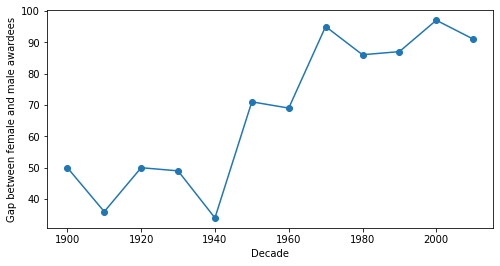

In [22]:
# A more interesting visualization here would be to have line plots on the gap between males and females
# to have better insights on time evolution
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

table5 = pd.crosstab(sel_nobel.loc[:,"awardDecade"],sel_nobel.loc[:,"gender"])

# To be able to plot the decade, it cannot be the index
table5_clear = table5.reset_index()
table5_clear.loc[:,"gap"] = (table5_clear.loc[:,"male"] - table5_clear.loc[:,"female"])

ax.plot(table5_clear["awardDecade"],table5_clear["gap"])
ax.scatter(table5_clear["awardDecade"],table5_clear["gap"])

### Add ax titles
ax.set_xlabel("Decade")
ax.set_ylabel("Gap between female and male awardees")

### Possible extension: get the percentage like in the previous example

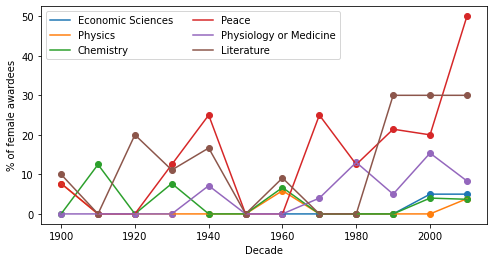

In [23]:
# To break this down by category, the simplest (though not cleanest) approach could be a for loop, selecting the
# DataFrame slices for each of the groups. 
# Moreso, the gap is affected also by the number of awardees. A better metric in this case
# could be the percentage of female awardees per decade

categories = sel_nobel.loc[:,"category"].unique()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
for cat in categories:
    sel_cat = sel_nobel[sel_nobel["category"] == cat]
    tablex = pd.crosstab(sel_cat.loc[:,"awardDecade"],sel_cat.loc[:,"gender"])
    
    # To be able to plot the decade, it cannot be the index
    tablex_clear = tablex.reset_index()
    tablex_clear.loc[:,"count"] = (tablex_clear.loc[:,"male"] + tablex_clear.loc[:,"female"])
    tablex_clear.loc[:,"perc"] = 100*(tablex_clear.loc[:,"female"]/tablex_clear.loc[:,"count"])
    
    ax.plot(tablex_clear["awardDecade"],tablex_clear["perc"],label=cat)
    ax.scatter(tablex_clear["awardDecade"],tablex_clear["perc"])
ax.legend(ncols=2)

### Add ax titles
ax.set_xlabel("Decade")
ax.set_ylabel("% of female awardees")

### Save
plt.savefig("NobelByGenderAndCategory.svg")

### Application example
From a table of experimental yields with different substituents (R1, R2 and R3) at three different temperatures (20º, 45º and 80ºC), build the corresponding heatmap. The data is `datasets/exp_data_example.dat`.
1. Read the DataFrame and look at it.
2. Reorganize the data, to have a matrix of temperature vs. substituent, where every point is a yield. To do this, use the **pd.pivot_table** function, with yield as the value field.
3. Generate the visualization and save it to a PNG file.


<AxesSubplot: xlabel='temp', ylabel='subst'>

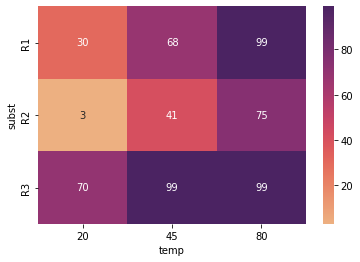

In [26]:
### Solved exercise

exp_data = pd.read_csv("datasets/exp_data_example.dat")
exp_table = pd.pivot_table(data=exp_data,index="subst",columns="temp",values="yield")
sns.heatmap(exp_table,cmap="flare",annot=True,fmt='d')
